In [1]:
#followed https://www.datacamp.com/community/tutorials/random-forests-classifier-python
# more info on random forest https://www.youtube.com/watch?v=RUEFSwN-orQ
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm

# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#fix balcony column
# drop columns lattitude longtitude eircode 



In [2]:
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
df = pd.read_csv('/Users/patrickmoloney/Downloads/data-rental2.csv', na_values = missing_value_formats)

In [3]:
df.head()

,approx,number,address 1,address 2,address 3,eircode,lattitude,longtitude,lattitude eyre square,longtitude eyre square,...,Distance GMIT,number of rooms,number of bathrooms,price per month,type,connection,BER,balcony,floor,heating
0,no,Chaplaincy House,Ballybane Road,Ballybane,NaN,H91 E2NY,53.279666,-9.008728,53.274839,-9.04863,...,0.209452,4,2,2100,house,NaN,d2,no,NaN,central
1,yes,NaN,cappagh road,knocknacarra,NaN,H91 PV0Y,53.271272,-9.132431,53.274839,-9.04863,...,8.135066,1,1,850,apartment,NaN,c1,no,ground,central
2,no,83,Maoilin,Ballymoneen Road,Moneen,H91 A6CH,53.271473,-9.121873,53.274839,-9.04863,...,7.434207,3,2,1800,house,NaN,a3,no,NaN,central
3,no,NaN,NaN,NaN,NaN,H91 W5RP,53.272302,-9.077226,53.274839,-9.04863,...,4.475861,1,1,850,apartment,NaN,NaN,no,ground,central
4,no,NaN,NaN,NaN,NaN,H91 K46R,53.273859,-9.026788,53.274839,-9.04863,...,1.176212,3,2,1600,house,NaN,d1,no,NaN,central


In [4]:
df.isna().sum()


approx                    206
number                    256
address 1                 194
address 2                 237
address 3                 360
eircode                   237
lattitude                   0
longtitude                  0
lattitude eyre square       0
longtitude eyre square      0
Distance Eyre Square        0
latitude salthill           0
longtitude salthill         0
Distance Salthill           0
latitude collage            0
longtitude collage          0
Distance NUIG               0
latitude gmit               0
longtitude gmit             0
Distance GMIT               0
number of rooms             0
number of bathrooms         0
price per month             0
type                        0
connection                265
BER                        14
balcony                     2
floor                     184
heating                     5
dtype: int64

In [5]:
value_list = ['house','townhouse']
df=df[df.type.isin(value_list)]
df.type.unique()

array(['house', 'townhouse'], dtype=object)

In [6]:
df=df.drop(columns='eircode')
df=df.drop(columns='lattitude') 
df=df.drop(columns='longtitude')
df=df.drop(columns='approx')
df=df.drop(columns='number')
df=df.drop(columns='address 1')
df=df.drop(columns='address 2')
df=df.drop(columns='address 3')
df=df.drop(columns='lattitude eyre square')
df=df.drop(columns='longtitude eyre square')
df=df.drop(columns='latitude salthill')
df=df.drop(columns='longtitude salthill')
df=df.drop(columns='latitude collage')
df=df.drop(columns='longtitude collage')
df=df.drop(columns='latitude gmit')
df=df.drop(columns='longtitude gmit')
# thse change depending on the thing we're looking at 
df=df.drop(columns='floor') 
df=df.drop(columns='type') 
#df=df.drop(columns='connection') 
#df=df.drop(columns='balcony') 

In [7]:
df.isna().sum()

Distance Eyre Square     0
Distance Salthill        0
Distance NUIG            0
Distance GMIT            0
number of rooms          0
number of bathrooms      0
price per month          0
connection              22
BER                      3
balcony                  0
heating                  1
dtype: int64

In [8]:
df.head()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,connection,BER,balcony,heating
0,2.706816,4.449858,3.520573,0.209452,4,2,2100,NaN,d2,no,central
2,4.884620,3.551142,4.097072,7.434207,3,2,1800,NaN,a3,no,central
4,1.456473,3.093256,2.398740,1.176212,3,2,1600,NaN,d1,no,central
5,2.313815,1.099351,1.721166,4.863595,4,2,2390,NaN,c3,no,central
7,3.430798,1.602936,3.073510,5.870060,4,2,2000,NaN,c2,yes,central


In [9]:
#only ber and heating has missing values 
df = df.dropna() #drop nan values , not removing 'na' values need to fix that 

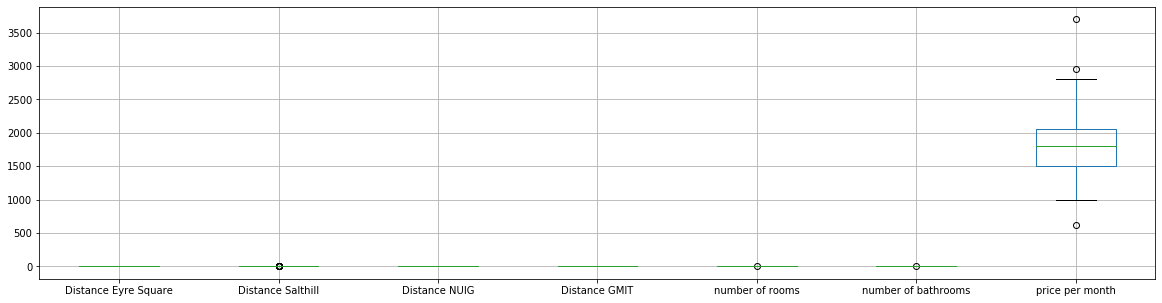

In [10]:
df.boxplot(figsize=(20,5))
plt.show() #outliers, distance from salthill, number of rooms and number of baths, should consider removing those 

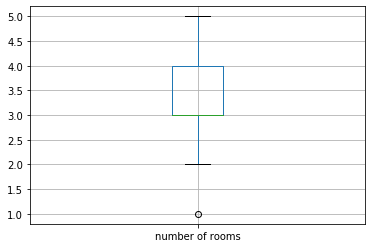

In [11]:
df.boxplot(column='number of rooms')
plt.show()

4 room apartment is showing as an outlier 

In [12]:
df.describe()

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,2.537873,2.702803,2.387336,3.998515,3.460938,2.203125,1835.054688
std,1.445358,1.399539,1.383277,2.094466,0.782710,0.746217,457.764257
min,0.007512,0.222579,0.311939,0.287843,1.000000,1.000000,620.000000
25%,1.528295,1.711574,1.265292,2.369964,3.000000,2.000000,1500.000000
50%,2.414687,2.474440,1.956178,4.029597,3.000000,2.000000,1800.000000
75%,3.789077,3.437742,3.472265,5.353093,4.000000,3.000000,2057.500000
max,5.477031,7.005967,6.308555,8.012278,5.000000,5.000000,3700.000000


In [13]:
scale_mapper = {
    "a1":15,
    "a2":14,
    "a3":13,
    "b1":12,
    "b2":11,
    "b3":10,
    "c1":9,
    "c2":8,
    "c3":7,
    "d1":6,
    "d2":5,
    "e1":4,
    "e2":3,
    "f":2,
    "g":1,
    "exempt":0
}

df['BER'] = df['BER'].replace(scale_mapper)

df.tail()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,connection,BER,balcony,heating
384,0.274648,2.079926,1.260954,2.291622,2,3,2000,attached,4,yes,central
385,0.067139,1.862889,0.935101,2.610332,4,2,2080,attached,0,yes,electric
387,1.844155,3.701195,2.156375,1.897147,1,1,1000,detached,8,no,central
388,4.478571,6.195593,5.269398,1.934727,3,2,1450,detached,9,no,central
391,1.539927,0.356783,1.500652,3.960231,5,2,2000,detached,6,no,central


In [14]:
df = pd.get_dummies(df, columns=[ 'connection','balcony','heating'])
df.tail()

#this gives us dummy variables for the categorical columns remaining, for mext run might be worth removing the balcony when examing both

,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,connection_attached,connection_detached,connection_lone,balcony_no,balcony_yes,heating_central,heating_electric
384,0.274648,2.079926,1.260954,2.291622,2,3,2000,4,1,0,0,0,1,1,0
385,0.067139,1.862889,0.935101,2.610332,4,2,2080,0,1,0,0,0,1,0,1
387,1.844155,3.701195,2.156375,1.897147,1,1,1000,8,0,1,0,1,0,1,0
388,4.478571,6.195593,5.269398,1.934727,3,2,1450,9,0,1,0,1,0,1,0
391,1.539927,0.356783,1.500652,3.960231,5,2,2000,6,0,1,0,1,0,1,0


In [15]:
del df['balcony_no']

In [16]:
del df['heating_central']

In [17]:
del df['connection_lone']

balcony_no, heating_electric, connection_attached 

In [18]:
df.head()


,Distance Eyre Square,Distance Salthill,Distance NUIG,Distance GMIT,number of rooms,number of bathrooms,price per month,BER,connection_attached,connection_detached,balcony_yes,heating_electric
13,2.446769,1.037478,1.917976,4.984487,4,3,2800,9,0,1,0,0
17,2.627352,1.430638,1.954203,5.180881,3,3,1500,6,0,1,0,0
18,1.907742,1.782552,0.975157,4.370977,3,1,1300,10,1,0,0,0
19,1.202837,0.697378,1.359845,3.586343,5,2,2500,5,0,1,0,0
21,0.007512,1.896556,1.000928,2.549793,3,2,620,10,1,0,1,0


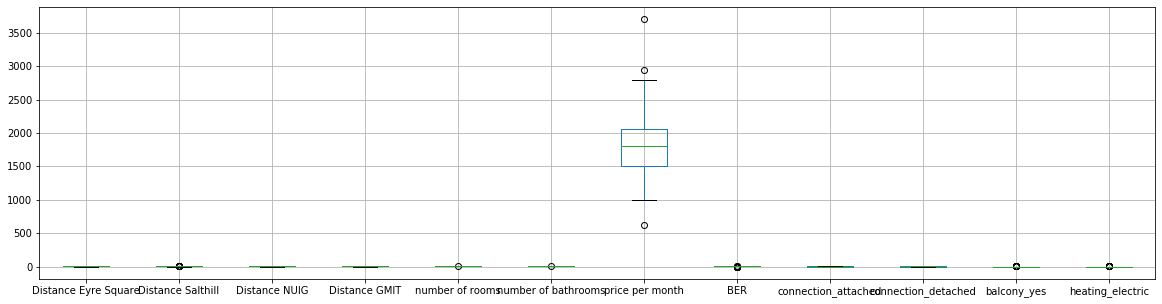

In [19]:
df.boxplot(figsize=(20,5))
plt.show()

In [20]:
standard_scaler = StandardScaler()
df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms','BER']] = standard_scaler.fit_transform(df[['Distance Eyre Square',
    'Distance Salthill','Distance NUIG','Distance GMIT','number of rooms','number of bathrooms','BER']])



In [21]:
y = df['price per month']
X = df.drop('price per month', axis=1).values



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [22]:
y_test.head()

263    2000
177    1450
99     2400
361    1575
351    2000
Name: price per month, dtype: int64

In [23]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=200)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [24]:
RandomForestRegressor(bootstrap=True, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='gini',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=df.drop('price per month', axis=1).columns).sort_values(ascending=False)
feature_imp

number of rooms         0.208429
Distance Salthill       0.197224
Distance Eyre Square    0.176319
Distance NUIG           0.162367
BER                     0.149095
Distance GMIT           0.049721
number of bathrooms     0.038517
connection_detached     0.007950
connection_attached     0.005145
balcony_yes             0.003843
heating_electric        0.001389
dtype: float64

No handles with labels found to put in legend.


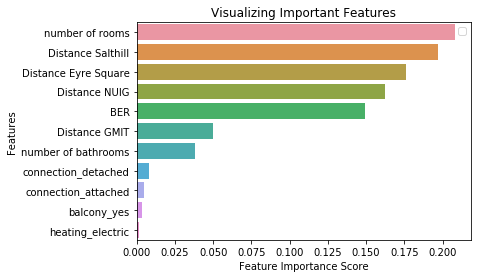

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=350)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("R2:",metrics.r2_score(y_test, y_pred))

R2: 0.44824459537139205


In [28]:
def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))*100

    return loss

In [29]:
from sklearn import metrics
print("R2:",metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Root Mean Square Percentage Error:', rmse(y_test, y_pred))

R2: 0.44824459537139205
Mean Absolute Error: 205.99901098901094
Mean Squared Error: 77984.00619560441
Root Mean Squared Error: 279.25616590436175
Root Mean Square Percentage Error: 15.635745059255543
